In [1]:
import pandas as pd
import numpy as np

In [2]:
path=r'C:\Users\user\us-baby-names\NationalNames.csv'
names = pd.read_csv(path)

In [3]:
names[:5]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


1. 시대별로 특정 이름이 차지하는 비율을 구해 얼마나 흔한 이름인지 알아보기
2. 이름의 상대순위 알아보기
3. 각 연도별 가장 인기있는 이름, 가장 빈도가 높거나 낮은 이름 알아보기
4. 모음, 자음, 길이, 전반적인 다양성, 철자변화, 첫글자와 마지막글자 등  이름유행 분석하기
5. 성서에 등장하는 이름, 유명인, 인구통게학적 변화 등 외부 자료를 통한 유행분석하기

## 1. 시대별로 특정 이름이 차지하는 비율을 구해 얼마나 흔한 이름인지 알아보기

In [4]:
total_births = names.pivot_table('Count',index='Year', columns='Gender',aggfunc=sum)

In [5]:
total_births.tail()

Gender,F,M
Year,,
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414
2013,1745339,1881463
2014,1768775,1901376


In [6]:
total_births.plot(title='Total births by Gender and Year')

### 각 이름이 전체 출생 수에서 차지하는 비율

In [7]:
def add_prob(group):
    births = group.Count.astype(float)
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['Year','Gender']).apply(add_prob)

In [8]:
names

,Id,Name,Year,Gender,Count,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188
5,6,Margaret,1880,F,1578,0.017342
6,7,Ida,1880,F,1472,0.016177
7,8,Alice,1880,F,1414,0.015540
8,9,Bertha,1880,F,1320,0.014507
9,10,Sarah,1880,F,1288,0.014155


그룹 연산 수행시 모든 그룹에서 porb의 합이 1이 맞는지 확인 연산을 해주는 것이 좋다.

In [9]:
np.allclose(names.groupby(['Year','Gender']).prop.sum(),1)

True

In [10]:
def get_top1000(group): 
    return group.sort_values(by='Count',ascending = False)[:1000]

In [11]:
grouped = names.groupby(['Year','Gender'])
top1000 = grouped.apply(get_top1000)
top1000

Id       Name  Year Gender  Count      prop
Year Gender                                                          
1880 F      0              1       Mary  1880      F   7065  0.077643
            1              2       Anna  1880      F   2604  0.028618
            2              3       Emma  1880      F   2003  0.022013
            3              4  Elizabeth  1880      F   1939  0.021309
            4              5     Minnie  1880      F   1746  0.019188
            5              6   Margaret  1880      F   1578  0.017342
            6              7        Ida  1880      F   1472  0.016177
            7              8      Alice  1880      F   1414  0.015540
            8              9     Bertha  1880      F   1320  0.014507
            9             10      Sarah  1880      F   1288  0.014155
            10            11      Annie  1880      F   1258  0.013825
            11            12      Clara  1880      F   1226  0.013474
            12            13       Ella  1880      F   1156  0.012704
            13            14   Florence  1880      F   1063  0.011682
            14            15       Cora  1880      F   1045  0.011484
            15            16     Martha  1880      F   1040  0.011429
            16            17      Laura  1880      F   1012  0.011122
            17            18     Nellie  1880      F    995  0.010935
            18            19      Grace  1880      F    982  0.010792
            19            20     Carrie  1880      F    949  0.010429
            20            21      Maude  1880      F    858  0.009429
            21            22      Mabel  1880      F    808  0.008880
            22            23     Bessie  1880      F    796  0.008748
            23            24     Jennie  1880      F    793  0.008715
            24            25   Gertrude  1880      F    787  0.008649
            25            26      Julia  1880      F    783  0.008605
            26            27     Hattie  1880      F    769  0.008451
            27            28      Edith  1880      F    768  0.008440
            28            29     Mattie  1880      F    704  0.007737
            29            30       Rose  1880      F    700  0.007693
...                      ...        ...   ...    ...    ...       ...
2014 M      1812426  1812427      Dario  2014      M    214  0.000113
            1812427  1812428       Kale  2014      M    214  0.000113
            1812428  1812429  Broderick  2014      M    213  0.000112
            1812429  1812430    Jayvion  2014      M    213  0.000112
            1812430  1812431     Kaison  2014      M    213  0.000112
            1812431  1812432       Koen  2014      M    213  0.000112
            1812432  1812433     Magnus  2014      M    213  0.000112
            1812435  1812436   Valentin  2014      M    212  0.000111
            1812434  1812435     Teagan  2014      M    212  0.000111
            1812433  1812434     Darien  2014      M    212  0.000111
            1812436  1812437      Bodie  2014      M    211  0.000111
            1812437  1812438    Brayson  2014      M    211  0.000111
            1812438  1812439      Chace  2014      M    211  0.000111
            1812439  1812440      Kylen  2014      M    209  0.000110
            1812440  1812441     Yehuda  2014      M    209  0.000110
            1812441  1812442    Bridger  2014      M    208  0.000109
            1812442  1812443     Howard  2014      M    208  0.000109
            1812443  1812444     Maddux  2014      M    208  0.000109
            1812444  1812445    Osvaldo  2014      M    208  0.000109
            1812445  1812446      Rocky  2014      M    208  0.000109
            1812449  1812450       Jair  2014      M    207  0.000109
            1812451  1812452      Tyree  2014      M    207  0.000109
            1812450  1812451    Reyansh  2014      M    207  0.000109
            1812448  1812449     Foster  2014      M    207  0.000109
            1812447  1812448      Bo

In [12]:
top1000.index = np.arange(len(top1000))
top1000

,Id,Name,Year,Gender,Count,prop
0,1,Mary,1880,F,7065,0.077643
1,2,Anna,1880,F,2604,0.028618
2,3,Emma,1880,F,2003,0.022013
3,4,Elizabeth,1880,F,1939,0.021309
4,5,Minnie,1880,F,1746,0.019188
5,6,Margaret,1880,F,1578,0.017342
6,7,Ida,1880,F,1472,0.016177
7,8,Alice,1880,F,1414,0.015540
8,9,Bertha,1880,F,1320,0.014507
9,10,Sarah,1880,F,1288,0.014155


전체 데이터셋과 상위 1000개의 이름 데이터로 흥미로운 이름 유행을 분석하겠다.
# 2. 이름유행 분석

In [14]:
boys = top1000[top1000.Gender=='M']
girls = top1000[top1000.Gender=='F']

In [17]:
total_birth = top1000.pivot_table('Count',index='Year',columns='Name',aggfunc=sum)

In [18]:
total_birth.head()

Name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
Year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [19]:
total_birth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1880 to 2014
Columns: 7031 entries, Aaden to Zuri
dtypes: float64(7031)
memory usage: 7.2 MB


## 2-1. 몇몇 이름의 추이를 그래프로 나타내기

In [21]:
subset = total_birth[['John','Harry','Mary','Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E31C3AFC88>,
      dtype=object)

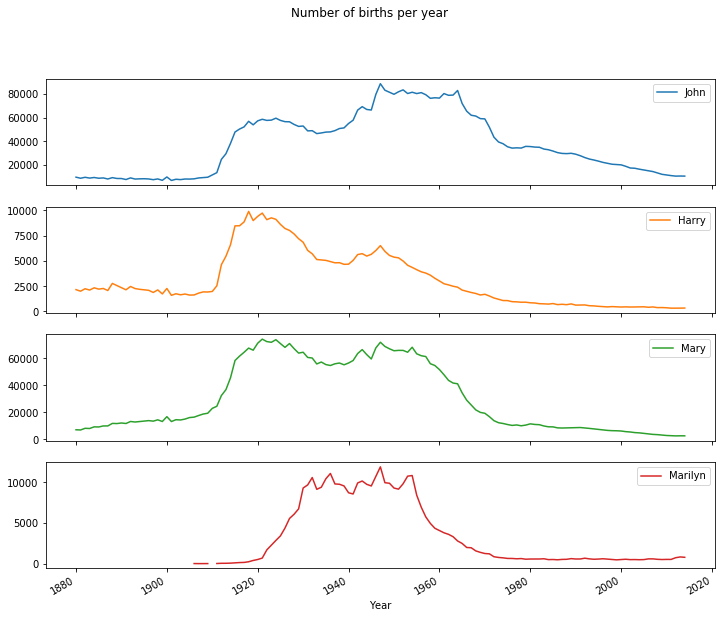

In [22]:
subset.plot(subplots=True, figsize = (12,10),grid=False,title="Number of births per year")

## 2-2. 다양한 이름을 사용하는 경향 파악하기

위그림에서 알 수 있듯이 그래프의 감소 추세는 부모가 아이의 이름을 지을 때 흔한 이름을 기피하는 것으로 해석할 수 있다.

인기있는 이름 1000개가 전체 출생수에서 차지하는 비율을 그래프에서 그려봐 증명하도록 한다.

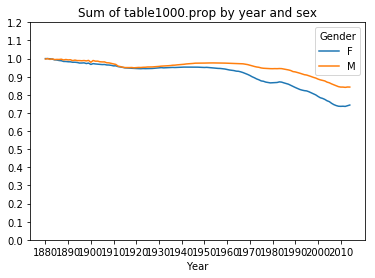

In [24]:
table = top1000.pivot_table('prop',index='Year',columns = 'Gender',aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

## 2-3. 전체의 50%가 되기까지 얼마나 많은 이름이 등장하는지 알아보기

In [27]:
df = boys[boys.Year==2010]

In [28]:
prop_cumsum = df.sort_values(by = 'prop',ascending = False).prop.cumsum()

In [29]:
prop_cumsum[:10]

260877    0.011538
260878    0.020935
260879    0.029979
260880    0.038941
260881    0.047839
260882    0.056587
260883    0.065171
260884    0.073434
260885    0.081541
260886    0.089625
Name: prop, dtype: float64

In [31]:
prop_cumsum.values.searchsorted(0.5) #배열의 색인으 116부터 시작하기 때문에 117

116

In [32]:
df = boys[boys.Year==1900]

In [33]:
in1900 = df.sort_values(by = 'prop',ascending = False).prop.cumsum()

In [34]:
in1900.searchsorted(0.5)+1

array([25], dtype=int64)

1900년대에는 50%로 되는 이름의 객수가 25개로 117개보다 더 적은 것을 확인할 수 있다.

이제 쉽게 이 연산을 연도와 성별에 apply함수를 이용해 조합한다.

In [42]:
def get_quantile_count(group,q=0.5):
    group=group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1


In [43]:
diversity = top1000.groupby(['Year','Gender']).apply(get_quantile_count)

In [44]:
diversity[:10]

Year  Gender
1880  F         38
      M         14
1881  F         38
      M         14
1882  F         38
      M         15
1883  F         39
      M         15
1884  F         39
      M         16
dtype: int64

In [46]:
diversity = diversity.unstack('Gender')

In [47]:
diversity[:10]

Gender,F,M
Year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


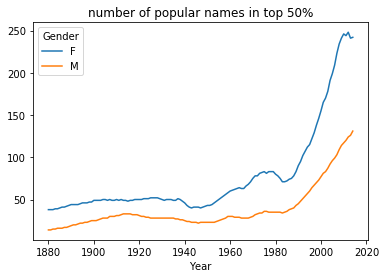

In [48]:
diversity.plot(title="number of popular names in top 50%")

여자아이의 이름은 남자아이의 이름보다 항상 다양했으며, 시간이 흐를수록 그 양상은 더욱 심해지는 것을 확인할 수 있다.

# 3. 마지막 글자의 변화

In [50]:
get_last_letter = lambda x: x[-1]
last_letters = names.Name.map(get_last_letter)
last_letters.name = 'last_letter'

In [52]:
table = names.pivot_table('Count',index=last_letters,columns=['Gender','Year'],aggfunc=sum)

In [54]:
subtable = table.reindex(columns=[1910,1960,2010],level='Year')
subtable.head()

Gender              F                            M                    
Year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108397.0  691245.0  675901.0    977.0    5214.0   28814.0
b                 NaN     694.0     454.0    411.0    3912.0   39208.0
c                 5.0      49.0     953.0    482.0   15466.0   23307.0
d              6751.0    3728.0    2635.0  22113.0  262143.0   44758.0
e            133601.0  435048.0  316288.0  28665.0  178810.0  130073.0

In [55]:
letter_prop=subtable/subtable.sum().astype(float)

In [56]:
import matplotlib.pyplot as plt

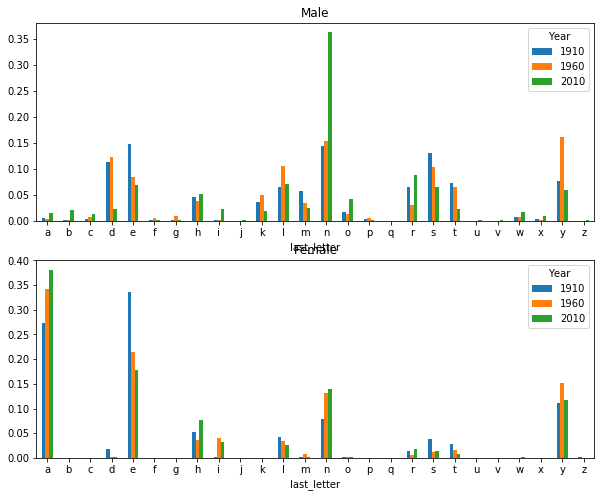

In [57]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female')

'n'으로 끝나는 남자아이 이름의 빈도가 1960년도 이후에 급격히 증가하는 것을 확인 할 수 있다.

전체자료로 다시 돌아가 출생 연도아 성별로 다시 정규화하고 남자아이 이름에서 몇글자를 선택하여 이 일므을 열로 하는 시계열 데이터로 변환한다.

In [59]:
letter_prop = table/table.sum().astype(float)

In [60]:
dny_ts = letter_prop.loc[['d','n','y'],'M'].T

In [61]:
dny_ts.head()

last_letter,d,n,y
Year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405


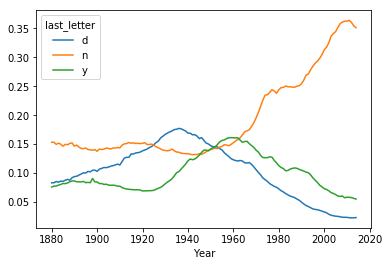

In [62]:
dny_ts.plot()

# 4. 남자이름과 여자이름이 바뀐 경우

In [74]:
all_names = top1000.Name.unique()

In [75]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [76]:
lesley_like = all_names[mask]

In [77]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [78]:
filtered = top1000[top1000.Name.isin(lesley_like)]

In [79]:
filtered.groupby('Name').Count.sum()

Name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    375129
Lesly      11429
Name: Count, dtype: int64

In [80]:
table = filtered.pivot_table('Count',index= 'Year',columns='Gender',aggfunc='sum')

In [81]:
table.tail()

Gender,F,M
Year,,
2010,2068.0,NaN
2011,1689.0,NaN
2012,1585.0,NaN
2013,1424.0,NaN
2014,1269.0,NaN


In [82]:
table = table.div(table.sum(1),axis=0) #표준화

In [83]:
table.tail()

Gender,F,M
Year,,
2010,1.0,NaN
2011,1.0,NaN
2012,1.0,NaN
2013,1.0,NaN
2014,1.0,NaN


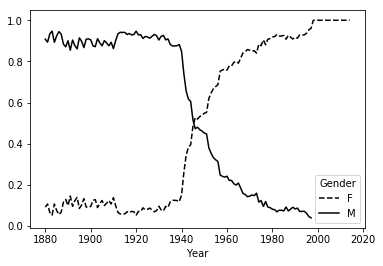

In [73]:
table.plot(style={'M':'k-','F':'k--'})